Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [18]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

#Split train into train and val
train,val = train_test_split(train, train_size = 0.80, test_size = 0.20,stratify=train['status_group'],random_state=45)

train.shape, val.shape,test.shape

((47520, 41), (11880, 41), (14358, 40))

In [16]:

###not using this code
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    # Also create a "missing indicator" column, because the fact that
    # values are missing may be a predictive signal.
    cols_with_zeros = ['longitude', 'latitude', 'construction_year', 
                       'gps_height', 'population']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
        X[col+'_MISSING'] = X[col].isnull()
            
    # Drop duplicate columns
    duplicates = ['quantity_group', 'payment_type']
    X = X.drop(columns=duplicates)
    
    # Drop recorded_by (never varies) and id (always varies, random)
    unusable_variance = ['recorded_by', 'id']
    X = X.drop(columns=unusable_variance)
    
    # Convert date_recorded to datetime
    X['date_recorded'] = pd.to_datetime(X['date_recorded'], infer_datetime_format=True)
    
    # Extract components from date_recorded, then drop the original column
    X['year_recorded'] = X['date_recorded'].dt.year
    X['month_recorded'] = X['date_recorded'].dt.month
    X['day_recorded'] = X['date_recorded'].dt.day
    X = X.drop(columns=['date_recorded','recorded_by'])
    
    # Engineer feature: how many years from construction_year to date_recorded
    X['years'] = X['year_recorded'] - X['construction_year']
    X['years_MISSING'] = X['years'].isnull()
    
    X['popu_per_year'] = X['population'].replace({0:1}) / X['yrs_bw_insp']
    X['popu_MISSING'] = X['popu_per_year'].isnull()
     
    # Engineer feature: Water per person
    X['water_per_person'] = X['amount_tsh']/X['population'].replace({0:1})
    X['water_per_person_MISSING'] = X['water_per_person'].isnull()


    
     # return the wrangled dataframe
    return X

    train = wrangle(train)
    val = wrangle(val)
    test = wrangle(test)

In [20]:
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
  
    #creating column year 
    X['year'] = pd.DatetimeIndex(X['date_recorded']).year
    

    #creating a new new column years between inspection
    X['construction_year'] = X['construction_year'].replace({0:2010})
    X['yrs_bw_insp'] = X['year'] - X['construction_year']  
    
    #to avoid error later,otherwise later when creating new features a positive will be divided by 0
    X['population'] = X['population'].replace({0:1}) 
    X['amount_tsh'] = X['amount_tsh'].replace({0:1})
    X['yrs_bw_insp'] = X['yrs_bw_insp'].replace({0:1})
    X['popu_per_year'] = X['population'] / X['yrs_bw_insp']
    X['water_per_person'] = X['amount_tsh']/X['population']

  


    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns=['quantity_group'])
    
    
    
    X= X.reset_index()

    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [28]:
train.shape

(47520, 44)

In [21]:
# The status_group column is the target
target = 'status_group'

X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [8]:
X_train.describe(exclude='number')

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,...,payment,payment_type,water_quality,quality_group,quantity,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,47520,44654,44638,47520,47520,47218,47520,47520,47520,44855,...,47520,47520,47520,47520,47520,47520,47520,47520,47520,47520
unique,348,1701,1914,30646,9,17226,21,125,2080,2,...,7,7,8,6,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Majengo,Iringa,Njombe,Igosi,True,...,never pay,never pay,soft,good,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,474,7262,13918,2868,8144,405,4251,2003,245,40826,...,20295,20295,40678,40678,26534,13524,13524,36641,22744,27625


In [13]:
conda install -c conda-forge category_encoders

Solving environment: ...working... 
  - anaconda/win-64::openssl-1.1.1d-he774522_2
  - defaults/win-64::openssl-1.1.1d-he774522_2done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [24]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state = 42,n_estimators=150,max_depth=25,min_samples_leaf=3,n_jobs=-1,max_features='log2')
    
                        )

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))

#score on val

print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.9128998316498317
Validation Accuracy 0.807996632996633


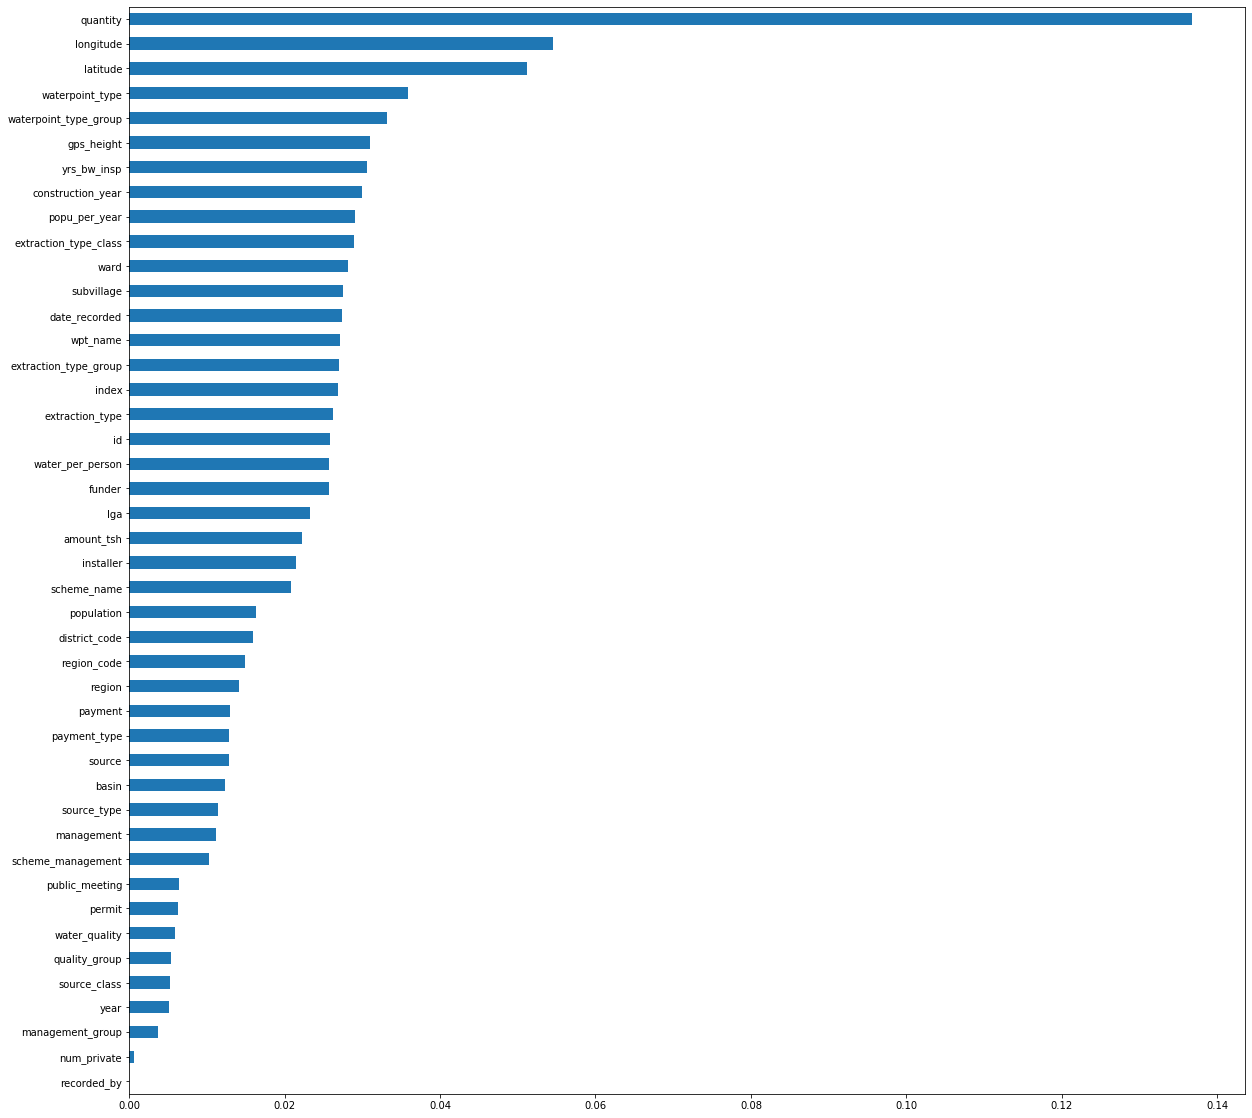

In [18]:
import matplotlib.pyplot as plt

rf = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
X_train_enc = encoder.transform(X_train)
importances = pd.Series(rf.feature_importances_, X_train_enc.columns)


plt.figure(figsize=(20,20))

importances.sort_values().plot.barh();

In [25]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

pipeline = make_pipeline(
       #ce.OneHotEncoder(use_cat_names=True),
       ce.ordinal.OrdinalEncoder(),
       SimpleImputer(strategy='median'),
       StandardScaler(),
       xgb.XGBClassifier(random_state=42,max_depth=12,colsample_bytree=0.9,n_estimators=100,n_jobs=-1,min_child_weight=3,gamma=1)
      )

#fit on train
pipeline.fit(X_train,y_train)

#score on train
#should have been only X_train
print('Train Accuracy', pipeline.score(X_train, y_train))

#score on val
#should have been only X_val
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.9270412457912458
Validation Accuracy 0.8018518518518518


In [7]:


###Not working


import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn. ensemble import  VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

encoder = ce.ordinal.OrdinalEncoder()
imputer = SimpleImputer()
scaler = StandardScaler()


xb = xgb.XGBClassifier(random_state=42,max_depth=12,colsample_bytree=0.6,n_estimators=55,n_jobs=-1,min_child_weight=0.5)
rf1= RandomForestClassifier(random_state = 42,n_estimators=100,max_depth=30,min_samples_leaf=2,n_jobs=-1)
rf = RandomForestClassifier(random_state = 42,n_estimators=115,max_depth=25,min_samples_leaf=3,n_jobs=-1,max_features='log2')
evc = VotingClassifier( estimators= [('xb',xb),('rf1',rf1),('rf',rf)], voting ='soft')
                       
            

X_train_encoded = encoder.fit_transform(X_train)
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_train_scaled = scaler.fit_transform(X_train_imputed)

evc.fit(X_train_scaled, y_train)

X_val_encoded = encoder.transform(X_val)
X_val_imputed = imputer.transform(X_val_encoded)
X_val_scaled = scaler.transform(X_val_imputed)
print('Train Accuracy',evc.score(X_train_scaled,y_train))
print('Validation Accuracy', evc.score(X_val_scaled, y_val))

X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
#y_pred = model.predict(X_test_scaled)

Train Accuracy 0.9427819865319865
Validation Accuracy 0.8103535353535354


In [5]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


pipeline = make_pipeline(
    ce.ordinal.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state = 42,n_estimators=276,max_depth=20,min_samples_leaf=3,n_jobs=-1,max_features=0.26478111843703844)
    
                        )

pipeline.fit(X_train, y_train)
print('Train Accuracy', pipeline.score(X_train, y_train))

#score on val

print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.9106271043771044
Validation Accuracy 0.8076599326599326


In [8]:
from scipy.stats import randint, uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

pipeline = make_pipeline(
       #ce.OneHotEncoder(use_cat_names=True),
       ce.ordinal.OrdinalEncoder(),
       SimpleImputer(),
       StandardScaler(),
       xgb.XGBClassifier(random_state=42)
)
   
param_distributions = {
                'simpleimputer__strategy': ['mean', 'median'], 
    'xgbclassifier__n_estimators': [randint(10, 30)], 
    'xgbclassifier__max_depth': [5, 10, 12, 15, 20], 
    'xgbclassifier__colsample_bytree': [0.3,0.5,0.6,0.8,0.9], 
    'xgbclassifier__min_child_weight':[0.5,0.6,0.7]

} 

search = RandomizedSearchCV(
                             pipeline,
                            param_distributions=param_distributions,
                            n_iter=7,
                            cv= 3,
                            scoring='accuracy',
                            verbose=10,
                            return_train_score= True,
                            n_jobs=-1
 )   
    
    
    
search.fit(X_train,y_train);

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done   8 out of  17 | elapsed:    4.8s remaining:    5.4s
[Parallel(n_jobs=-1)]: Done  10 out of  17 | elapsed:    4.8s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done  12 out of  17 | elapsed:    4.8s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  14 out of  17 | elapsed:    4.8s remaining:    0.9s


TypeError: 'rv_frozen' object cannot be interpreted as an integer